# Import Libraries

In [1]:
from os import path

import pandas as pd

from sklearn.decomposition import PCA


import matplotlib.pyplot as plt

# Load Processed Data

In [2]:
df = pd.read_csv(path.join('..', 'data', 'heart_disease_preprocessed.csv'))
df.head()

,age,sex_female,sex_male,cp_typical_angina,cp_atypical_angina,cp_non_anginal_pain,cp_asymptomatic,trestbps,chol,fbs_<120mg/dl,...,slope_flat,slope_downsloping,ca_0,ca_1,ca_2,ca_3,thal_normal,thal_fixed_defect,thal_reversible_defect,num
0,0.936181,0.0,1.0,1.0,0.0,0.0,0.0,0.750380,-0.276443,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,1.378929,0.0,1.0,0.0,0.0,0.0,1.0,1.596266,0.744555,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2
2,1.378929,0.0,1.0,0.0,0.0,0.0,1.0,-0.659431,-0.353500,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,-1.941680,0.0,1.0,0.0,0.0,1.0,0.0,-0.095506,0.051047,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,-1.498933,1.0,0.0,0.0,1.0,0.0,0.0,-0.095506,-0.835103,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


# Apply Principal Component Analysis (PCA)

In [3]:
X = df.drop(columns=['num'])
y = df['num']

pca = PCA()
X_pca = pca.fit_transform(X)

# Determine The Optimal Number of Principal Components

In [4]:
print(f"Explained variance_ratio:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC {i+1}: {ratio:.4f}")
print("\n")

Explained variance_ratio:
PC 1: 0.2453
PC 2: 0.1390
PC 3: 0.1015
PC 4: 0.0923
PC 5: 0.0642
PC 6: 0.0577
PC 7: 0.0516
PC 8: 0.0390
PC 9: 0.0339
PC 10: 0.0307
PC 11: 0.0273
PC 12: 0.0256
PC 13: 0.0238
PC 14: 0.0185
PC 15: 0.0137
PC 16: 0.0099
PC 17: 0.0089
PC 18: 0.0078
PC 19: 0.0073
PC 20: 0.0020
PC 21: 0.0000
PC 22: 0.0000
PC 23: 0.0000
PC 24: 0.0000
PC 25: 0.0000
PC 26: 0.0000
PC 27: 0.0000
PC 28: 0.0000




In [5]:
print(f"Cumulative sum of explained variance ratios:\n {pca.explained_variance_ratio_.cumsum()}\n")

Cumulative sum of explained variance ratios:
 [0.2452986  0.38431218 0.48584343 0.57811755 0.64226924 0.69994948
 0.75158183 0.79061579 0.82454737 0.8552126  0.88249554 0.90807069
 0.93191681 0.95040252 0.9641131  0.97403115 0.98290974 0.99068858
 0.99795846 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]



# Visualize PCA results

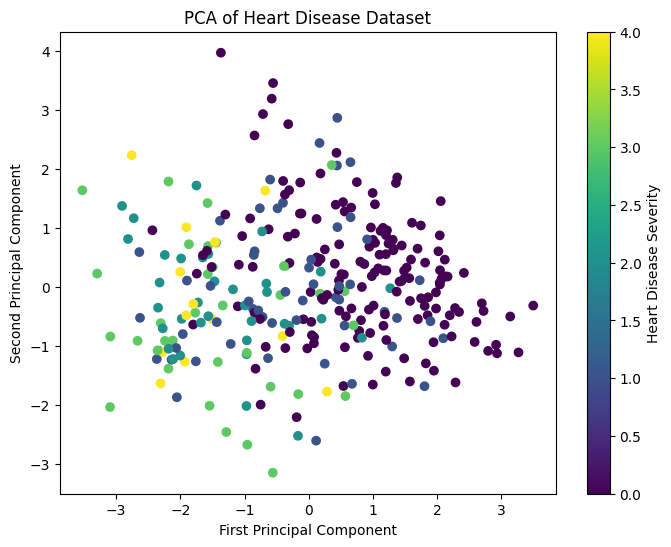

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Heart Disease Dataset')
plt.colorbar(label="Heart Disease Severity")
plt.show()

No significant clustering is observed in the PCA plot, indicating that the data points are fairly evenly distributed across the principal component space.

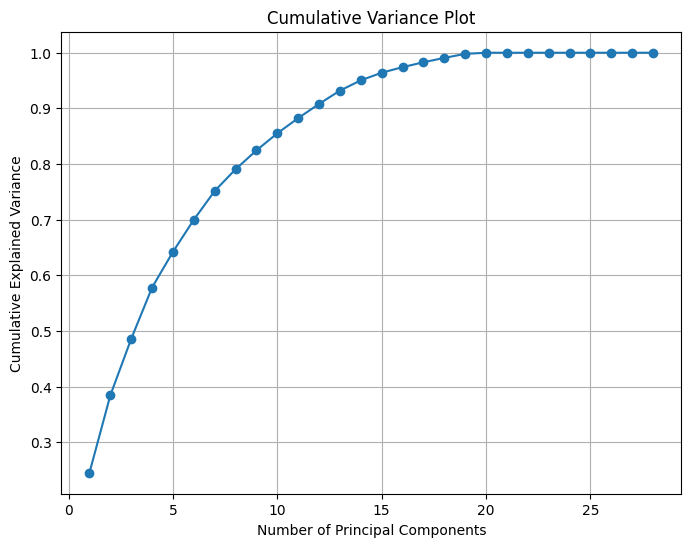

In [7]:
cumulative_var = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance Plot")
plt.grid()
plt.show()

# Apply PCA with 14 principal components 95% threshold

In [8]:
pca_reduced = PCA(n_components=14)
X_pca_reduced = pca_reduced.fit_transform(X)
df_pca = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(X_pca_reduced.shape[1])])
df_pca['num'] = y.values
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,num
0,-1.087992,0.372638,1.271275,-0.240135,0.576431,0.856537,0.603891,-0.614801,-0.541453,0.245773,0.736680,0.686322,-0.640268,0.368900,0
1,-2.813771,0.807979,-0.120024,-0.558623,-0.570164,-0.825947,0.571407,0.003537,-0.490289,0.185441,0.161555,-0.754878,-0.485284,-0.437692,2
2,-2.329030,-1.089585,-0.474496,-0.027767,0.031975,1.028541,0.443364,0.631092,0.359245,0.250978,0.287731,0.055109,0.039899,0.056094,1
3,1.163143,-0.662409,1.579279,2.340236,1.617635,0.380933,-0.506575,-0.384098,-0.565434,-0.351726,0.162886,-0.532354,-0.092187,-0.393656,0
4,1.749042,-0.197127,0.929031,0.555730,0.824813,-0.459967,0.946655,0.539861,-0.350032,0.043926,-0.498762,0.214697,0.208312,0.900747,0


In [9]:
# Save the PCA-transformed dataset
df_pca.to_csv(path.join('..', 'data', 'heart_disease_pca.csv'), index=False)